<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1u_KeRuzrp_I5XyMXcxNb4na5921iVHxE?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bagussatya/DeepLearning-TensorFlow/blob/main/Transfer%20Learning/Transfer%20Learning.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

source: http://weegee.vision.ucmerced.edu/datasets/landuse.html


This is a 21 class land use image dataset meant for research purposes.

There are 100 images for each of the following classes:

* agricultural
* airplane
* baseballdiamond
* beach
* buildings
* chaparral
* denseresidential
* forest
* freeway
* golfcourse
* harbor
* intersection
* mediumresidential
* mobilehomepark
* overpass
* parkinglot
* river
* runway
* sparseresidential
* storagetanks
* tenniscourt


Each image measures 256x256 pixels.

In [1]:
!wget --no-check-certificate \
http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip \
-O ./UCMerced_LandUse.zip

--2022-02-10 16:30:59--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘./UCMerced_LandUse.zip’

./UCMerced_LandUse. 100%[===================>] 317.07M  36.2MB/s    in 12s     

2022-02-10 16:31:12 (25.4 MB/s) - ‘./UCMerced_LandUse.zip’ saved [332468434/332468434]



In [2]:
# Mengekstrak file zip
import zipfile, os

local_zip = './UCMerced_LandUse.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()


In [3]:
!pip install split-folders tqdm
import splitfolders

splitfolders.ratio('/content/UCMerced_LandUse/Images', output='Data', seed=1337, ratio=(.8, .2, .0), group_prefix=None)

Copying files: 2100 files [00:01, 1912.71 files/s]


In [4]:
base_dir = './Data'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [5]:
train_file_names = os.listdir(train_dir)
train_class_dir = []

for fname in train_file_names:
  train_class_dir.append(os.path.join(train_dir, fname))
  print('total training ', fname, 'images : ', len(os.listdir(  os.path.join(train_dir, fname) ) ))

total training  storagetanks images :  80
total training  beach images :  80
total training  sparseresidential images :  80
total training  tenniscourt images :  80
total training  mediumresidential images :  80
total training  harbor images :  80
total training  overpass images :  80
total training  freeway images :  80
total training  runway images :  80
total training  buildings images :  80
total training  forest images :  80
total training  denseresidential images :  80
total training  airplane images :  80
total training  river images :  80
total training  chaparral images :  80
total training  agricultural images :  80
total training  mobilehomepark images :  80
total training  baseballdiamond images :  80
total training  golfcourse images :  80
total training  parkinglot images :  80
total training  intersection images :  80


In [6]:
val_file_names = os.listdir(val_dir)

for fname in val_file_names:
  print('total validation ', fname, 'images : ', len(os.listdir(  os.path.join(val_dir, fname) ) ))

total validation  storagetanks images :  20
total validation  beach images :  20
total validation  sparseresidential images :  20
total validation  tenniscourt images :  20
total validation  mediumresidential images :  20
total validation  harbor images :  20
total validation  overpass images :  20
total validation  freeway images :  20
total validation  runway images :  20
total validation  buildings images :  20
total validation  forest images :  20
total validation  denseresidential images :  20
total validation  airplane images :  20
total validation  river images :  20
total validation  chaparral images :  20
total validation  agricultural images :  20
total validation  mobilehomepark images :  20
total validation  baseballdiamond images :  20
total validation  golfcourse images :  20
total validation  parkinglot images :  20
total validation  intersection images :  20


In [7]:
# Melihat isi tiap folder
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 21
ncols = 4

pic_index = 0 # Index for iterating over images

train_class_obj = {}

for fname in train_class_dir:
  train_class_obj[fname] = os.listdir(fname)

next_train_pix = []
for fname in train_class_obj:
  for oname in train_class_obj[fname][:4]:
    next_train_pix.append(os.path.join(fname, oname))
  
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, nrows*4)

pic_index+=4


for i in range(len(next_train_pix)):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(next_train_pix[i])
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  vertical_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest'
                )

test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest'
                )

In [9]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(256, 256), # mengubah resolusi gambar menjadi 256 x 256 pixel
                    batch_size=4,
                    class_mode='categorical' # karena masalah kita merupakan klasifikasi > 2 kelas
                  )

validation_generator = test_datagen.flow_from_directory(
                    val_dir,
                    target_size=(256, 256), # mengubah resolusi gambar menjadi 256 x 256 pixel
                    batch_size=4,
                    class_mode='categorical' # karena masalah kita merupakan klasifikasi > 2 kelas
                  )

Found 1680 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


In [10]:
model = tf.keras.models.Sequential([
                                    # Note the input shape is the desired size of the image 256x256 with 3 bytes color. DON'T FORGET!! ADJUST IT TO UR FILE SHAPE!
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-20 where 0 for 1st class ('agriculture') and 20 for the last class ('tenniscourt')
                                    tf.keras.layers.Dense(21, activation='softmax')
        ])

In [11]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=48, 
    epochs=5, 
    validation_data=validation_generator, 
    validation_steps=5,
    verbose=1
)

Epoch 1/5
48/48 [==============================] - 14s 70ms/step - loss: 3.0789 - accuracy: 0.0677 - val_loss: 3.1059 - val_accuracy: 0.0000e+00
Epoch 2/5
48/48 [==============================] - 3s 67ms/step - loss: 2.9634 - accuracy: 0.0677 - val_loss: 2.9867 - val_accuracy: 0.0500
Epoch 3/5
48/48 [==============================] - 4s 82ms/step - loss: 3.0119 - accuracy: 0.0469 - val_loss: 3.0392 - val_accuracy: 0.0000e+00
Epoch 4/5
48/48 [==============================] - 3s 68ms/step - loss: 3.0281 - accuracy: 0.0417 - val_loss: 2.9981 - val_accuracy: 0.0500
Epoch 5/5
48/48 [==============================] - 3s 68ms/step - loss: 2.8809 - accuracy: 0.1302 - val_loss: 2.9129 - val_accuracy: 0.1500


In [13]:
#dengan transfer learning menggunakan model Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception

base_model = Xception(weights='imagenet', input_shape = (256,256,3),
                      include_top=False, pooling = 'avg')

x = base_model.output
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(21, activation='softmax')(x)

83697664/83683744 [==============================] - 1s 0us/step


In [14]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-tra
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# train the model on the new data for a few epochs
history = model.fit(train_generator, epochs=5,
                    steps_per_epoch=48,
                    validation_data = validation_generator,
                    validation_steps=5,
                    verbose = 1)

Epoch 1/5
48/48 [==============================] - 12s 199ms/step - loss: 2.4358 - accuracy: 0.3333 - val_loss: 1.4909 - val_accuracy: 0.8000
Epoch 2/5
48/48 [==============================] - 6s 114ms/step - loss: 1.0920 - accuracy: 0.7031 - val_loss: 0.9622 - val_accuracy: 0.7000
Epoch 3/5
48/48 [==============================] - 4s 75ms/step - loss: 0.7374 - accuracy: 0.7604 - val_loss: 0.4167 - val_accuracy: 0.8500
Epoch 4/5
48/48 [==============================] - 4s 75ms/step - loss: 0.5671 - accuracy: 0.8177 - val_loss: 1.0504 - val_accuracy: 0.7500
Epoch 5/5
48/48 [==============================] - 4s 75ms/step - loss: 0.5673 - accuracy: 0.8281 - val_loss: 0.4528 - val_accuracy: 0.8500


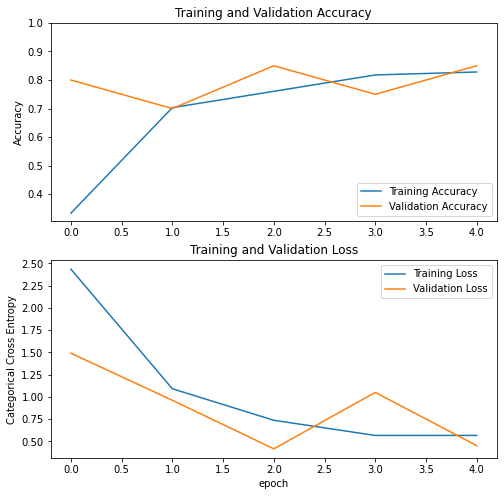

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  133


In [18]:
# we chose to train the last inception blocks, i.e. we will freeze
# the first 125 layers and unfreeze the rest:
for layer in base_model.layers[:125]:
    layer.trainable = False
for layer in base_model.layers[125:]:
    layer.trainable = True
# we need to recompile the model for these modifications to take effect
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator, epochs=10,
                    initial_epoch=history.epoch[-1],
                    steps_per_epoch=48,
                    validation_data = validation_generator,
                    validation_steps=5,
                    verbose = 1)

Epoch 5/10
48/48 [==============================] - 7s 94ms/step - loss: 2.0751 - accuracy: 0.3594 - val_loss: 5.7999 - val_accuracy: 0.6000
Epoch 6/10
48/48 [==============================] - 5s 114ms/step - loss: 1.5373 - accuracy: 0.5625 - val_loss: 2.3501 - val_accuracy: 0.6000
Epoch 7/10
48/48 [==============================] - 4s 78ms/step - loss: 1.1571 - accuracy: 0.6771 - val_loss: 1.2321 - val_accuracy: 0.7000
Epoch 8/10
48/48 [==============================] - 4s 78ms/step - loss: 0.8990 - accuracy: 0.7500 - val_loss: 0.5636 - val_accuracy: 0.9000
Epoch 9/10
48/48 [==============================] - 4s 77ms/step - loss: 1.0161 - accuracy: 0.6875 - val_loss: 0.9352 - val_accuracy: 0.8500
Epoch 10/10
48/48 [==============================] - 4s 77ms/step - loss: 1.0366 - accuracy: 0.6979 - val_loss: 1.8143 - val_accuracy: 0.9000


In [21]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']

loss += history.history['loss']
val_loss += history.history['val_loss']

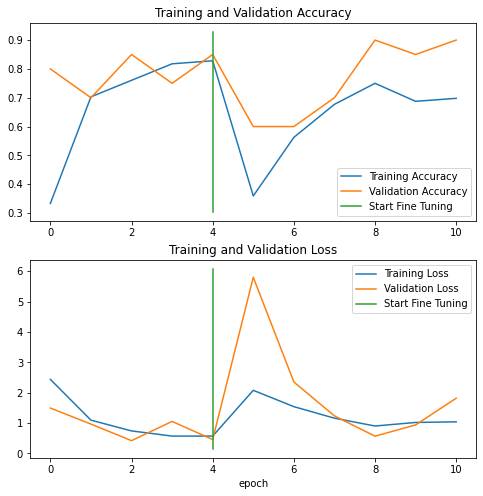

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([5-1,5-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([5-1,5-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from keras.preprocessing import image

labels = train_generator.class_indices.keys()
label = []
for a in labels:
  label.append(a)

Saving agricultural13.tif to agricultural13.tif


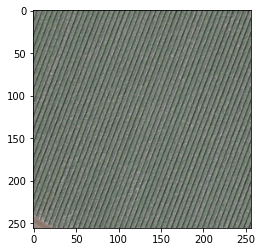

agricultural: 100.00%
forest: 0.00%
runway: 0.00%


In [26]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  

  images = np.vstack([x])
  proba = model.predict(images)[0]
  #mendapatkan 3 tertinggi
  max_index_row = proba.argsort()[-3:][::-1]
  plt.imshow(img)
  plt.show()
  for i in max_index_row:
    print("{}: {:.2f}%".format(label[i], proba[i] * 100))